<a href="https://colab.research.google.com/github/sakethyalamanchili/SimpleML-Projects/blob/main/food_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network and Computer Vision with TensorFlow

- **Convolutional Neural Network (CNN)** is a special kind of Neural Network which can be used for Computer Vision for detecting patterns in Visual Data.

- We are going to use two of the categories, pizza 🍕 and steak 🥩 and build a **binary classifier**.

In [ ]:
import zipfile
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import joblib

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip','r')
zip_ref.extractall()
zip_ref.close()

--2024-03-26 12:40:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  93.3MB/s    in 1.1s    

2024-03-26 12:40:46 (93.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



Let's inspect each of the directories we have downloaded. To do so, we have a command `ls` which stands for list.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/test/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Another method to find the number of images in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted(item.name for item in data_dir.glob('*'))) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


As we have got the collection of 750 training images and 250 testing images, let's now randomly visualize the images.

## Binary Classification

In [ ]:
# View an image
def view_random_image(target_dir, target_class):
  # Setup target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('Off')

  print(f"Image Shape: {img.shape}") # show the shape of the image

  return img

Image Shape: (512, 382, 3)


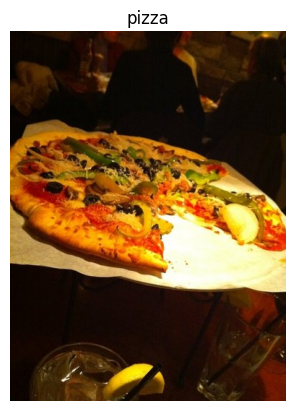

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

array([[[  9,   4,   1],
        [ 12,   7,   4],
        [ 13,   8,   5],
        ...,
        [ 60,  22,   0],
        [ 57,  16,   0],
        [ 54,  13,   0]],

       [[  9,   4,   1],
        [ 11,   6,   3],
        [ 12,   7,   4],
        ...,
        [ 60,  22,   0],
        [ 56,  18,   0],
        [ 53,  15,   0]],

       [[  9,   4,   1],
        [ 11,   6,   3],
        [ 11,   6,   3],
        ...,
        [ 58,  22,   0],
        [ 56,  20,   0],
        [ 54,  17,   0]],

       ...,

       [[ 10,   7,   2],
        [  9,   6,   1],
        [  9,   6,   1],
        ...,
        [104,  25,   8],
        [ 99,  18,   1],
        [ 98,  17,   0]],

       [[  7,   6,   1],
        [  6,   5,   0],
        [  8,   5,   0],
        ...,
        [104,  25,   8],
        [100,  19,   2],
        [ 98,  17,   0]],

       [[  6,   5,   0],
        [  6,   5,   0],
        [  8,   5,   0],
        ...,
        [105,  26,   9],
        [100,  19,   2],
        [ 97,  16,   0]]], dtype=uint8)
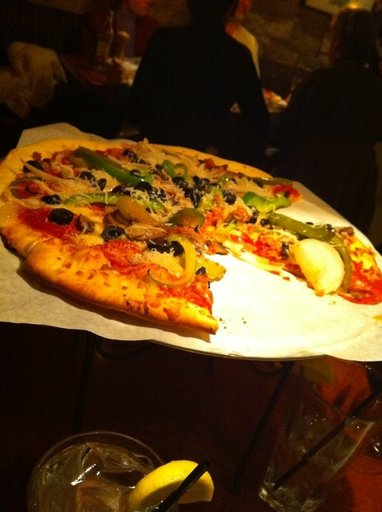

In [ ]:
img

The image is in the form of `(height, width, color channel)`

In [ ]:
img/255

array([[[0.03529412, 0.01568627, 0.00392157],
        [0.04705882, 0.02745098, 0.01568627],
        [0.05098039, 0.03137255, 0.01960784],
        ...,
        [0.23529412, 0.08627451, 0.        ],
        [0.22352941, 0.0627451 , 0.        ],
        [0.21176471, 0.05098039, 0.        ]],

       [[0.03529412, 0.01568627, 0.00392157],
        [0.04313725, 0.02352941, 0.01176471],
        [0.04705882, 0.02745098, 0.01568627],
        ...,
        [0.23529412, 0.08627451, 0.        ],
        [0.21960784, 0.07058824, 0.        ],
        [0.20784314, 0.05882353, 0.        ]],

       [[0.03529412, 0.01568627, 0.00392157],
        [0.04313725, 0.02352941, 0.01176471],
        [0.04313725, 0.02352941, 0.01176471],
        ...,
        [0.22745098, 0.08627451, 0.        ],
        [0.21960784, 0.07843137, 0.        ],
        [0.21176471, 0.06666667, 0.        ]],

       ...,

       [[0.03921569, 0.02745098, 0.00784314],
        [0.03529412, 0.02352941, 0.00392157],
        [0.03529412, 0

Let's build a convolutional neural network to find the patterns in our images, more specifically we need a way to:

- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- Compile our CNN
- Fit the CNN to our training data

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 150ms/step - loss: 0.5755 - accuracy: 0.6847 - val_loss: 0.4421 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4511 - accuracy: 0.7933 - val_loss: 0.3478 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4151 - accuracy: 0.8160 - val_loss: 0.3496 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3839 - accuracy: 0.8253 - val_loss: 0.3251 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.3277 - accuracy: 0.8607 - val_loss: 0.3047 - val_accuracy: 0.8760


Image Shape: (307, 512, 3)
Image Shape: (512, 512, 3)


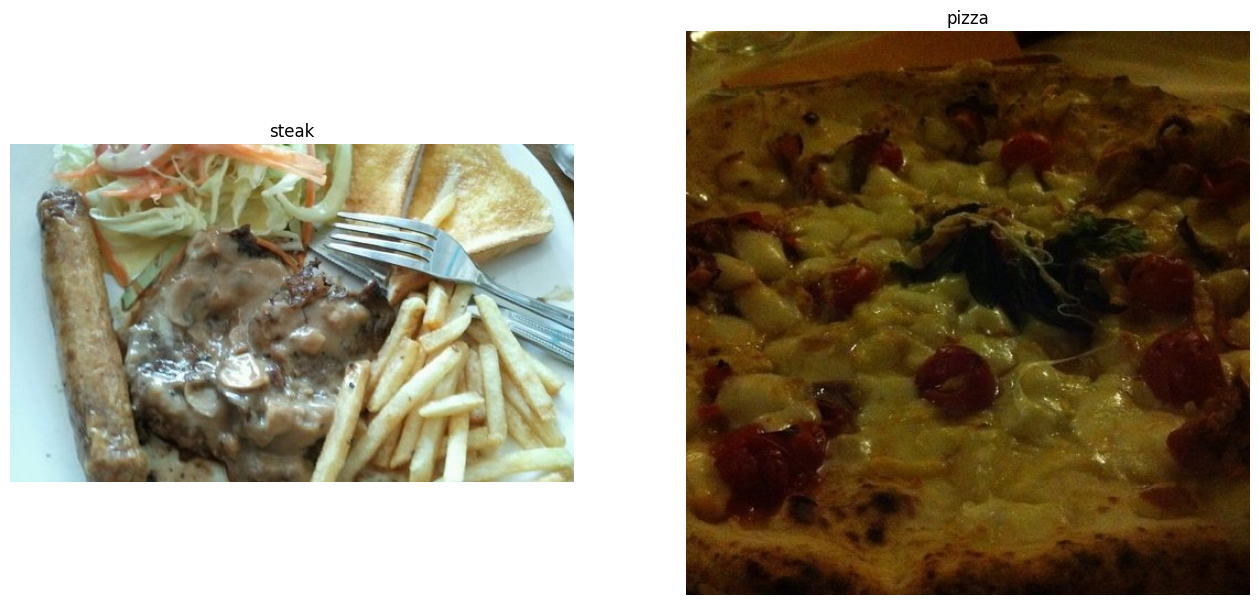

In [ ]:
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
steak_1 = view_random_image(target_dir = "pizza_steak/train/", target_class = "steak")

plt.subplot(1,2,2)
pizza_1 = view_random_image(target_dir = "pizza_steak/train/", target_class = "pizza")

In [ ]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(loss))

    plt.figure(figsize=(12, 6))  # Set figure size

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title("Loss", fontweight='bold')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')  # Added ylabel for clarity
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title("Accuracy", fontweight='bold')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")  # Added ylabel for clarity
    plt.legend()

    plt.tight_layout()  # Adjust subplot parameters to give specified padding
    plt.show()

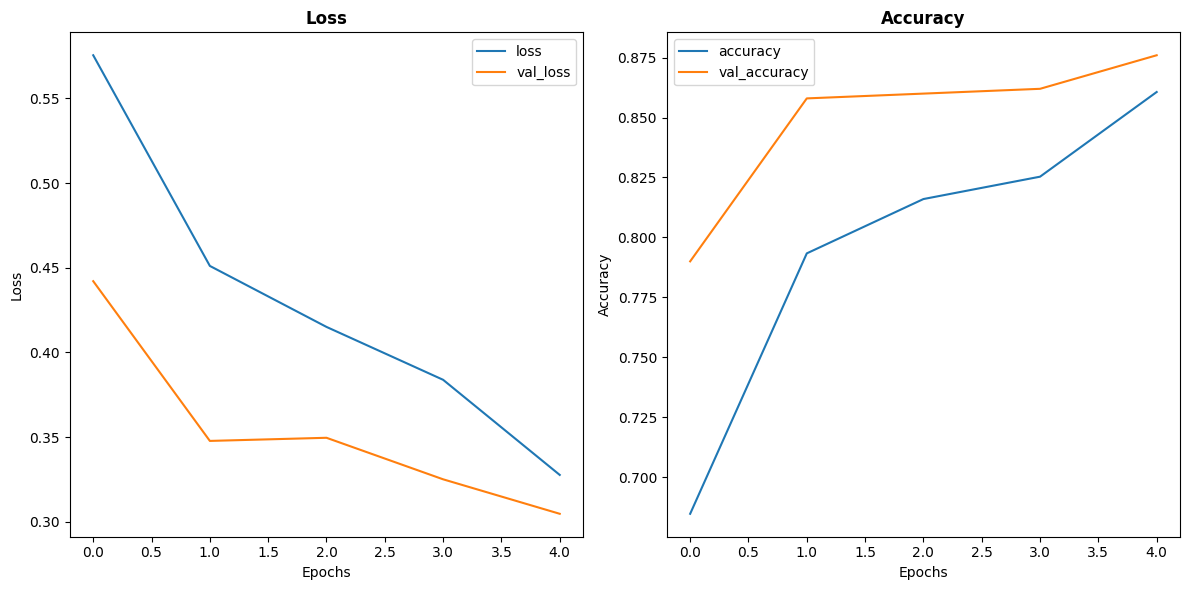

In [ ]:
plot_loss_curves(history_1)

In [ ]:
tf.random.set_seed(42)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               (224, 224),
                                               class_mode = 'binary',
                                               batch_size=32,
                                               seed=42,
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             (224, 224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


47/47 [==============================] - 9s 147ms/step - loss: 3.8441 - accuracy: 0.5307 - val_loss: 0.7530 - val_accuracy: 0.5960
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.7095 - accuracy: 0.5907 - val_loss: 0.6973 - val_accuracy: 0.5760
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6346 - accuracy: 0.6387 - val_loss: 0.6709 - val_accuracy: 0.6140
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.5641 - accuracy: 0.6967 - val_loss: 0.6653 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4846 - accuracy: 0.7560 - val_loss: 0.6592 - val_accuracy: 0.6480


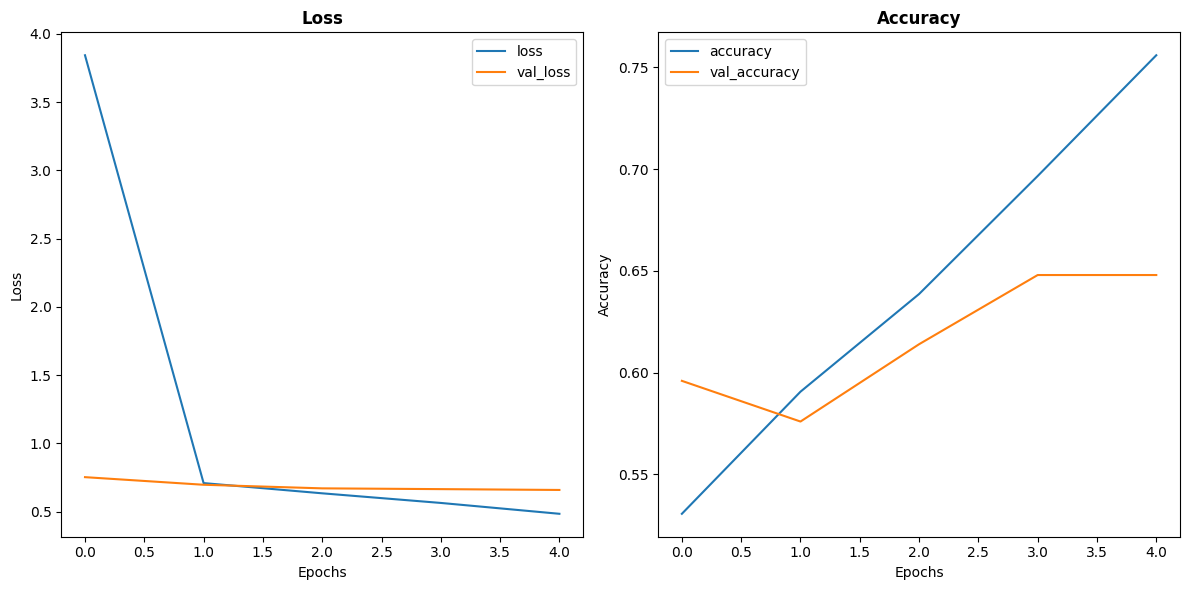

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [ ]:
tf.random.set_seed(42)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               shuffle=True,
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 167ms/step - loss: 1.0568 - accuracy: 0.5327 - val_loss: 0.6914 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6067 - accuracy: 0.6860 - val_loss: 0.5261 - val_accuracy: 0.7280
Epoch 3/5
47/47 [==============================] - 8s 163ms/step - loss: 0.4630 - accuracy: 0.7873 - val_loss: 0.5107 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.4051 - accuracy: 0.8273 - val_loss: 0.4007 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.3215 - accuracy: 0.8633 - val_loss: 0.3976 - val_accuracy: 0.8240


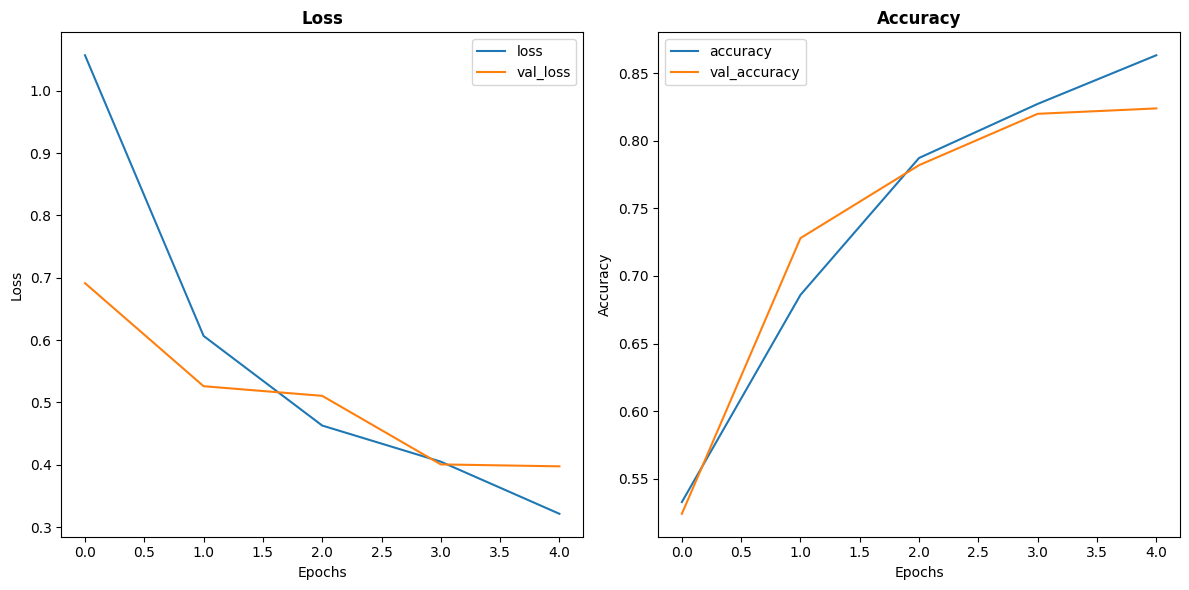

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              (224, 224),
                                              class_mode = 'binary',
                                              batch_size=32,
                                              seed=42,
                                              shuffle=True)

train_datagen_augumented = ImageDataGenerator(rescale=1./255,
                                                rotation_range=0.2,
                                                width_shift_range=0.2,
                                                height_shift_range=0.3,
                                                zoom_range=0.2,
                                                horizontal_flip=True,
                                                shear_range=0.2)

train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                    (224, 224),
                                                                    class_mode = 'binary',
                                                                    batch_size=32,
                                                                    seed=42,
                                                                    shuffle=True)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augumented_images, augumented_labels = train_data_augumented.next()

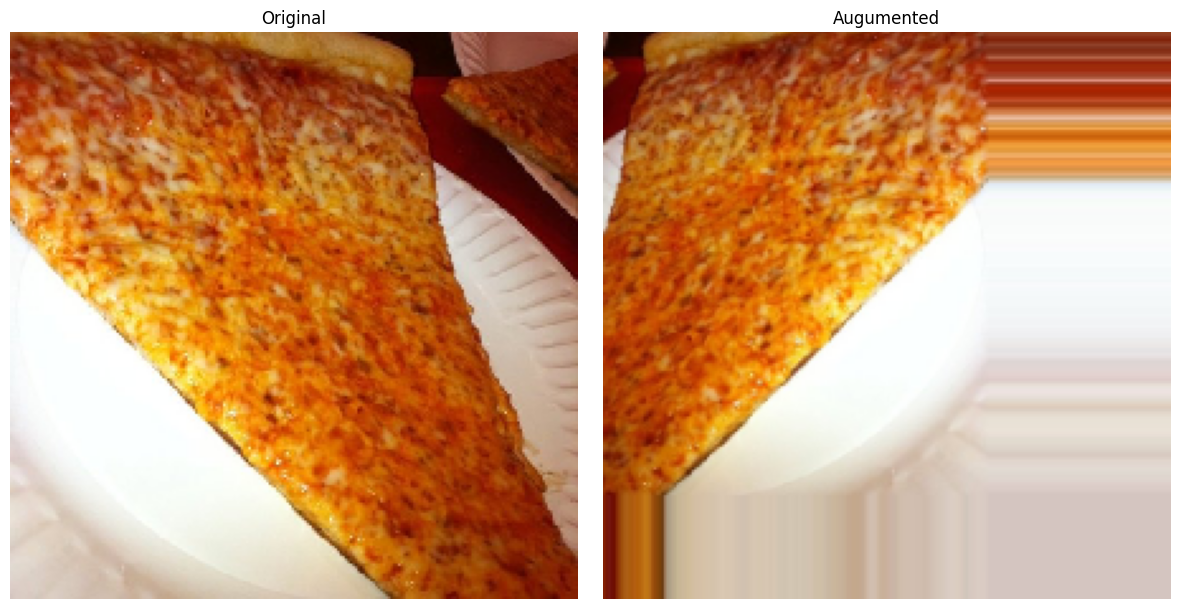

In [ ]:
plt.figure(figsize=(12,6))
random_image = random.randint(0, 32)
plt.subplot(1,2,1)
plt.imshow(images[random_image])
plt.title("Original")
plt.axis("Off")

plt.subplot(1,2,2)
plt.imshow(augumented_images[random_image])
plt.title("Augumented")
plt.axis("Off")

plt.tight_layout()
plt.show()

In [ ]:
tf.random.set_seed(42)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen_augumented = ImageDataGenerator(rescale=1./255,
                                                rotation_range=0.2,
                                                width_shift_range=0.2,
                                                height_shift_range=0.3,
                                                zoom_range=0.2,
                                                horizontal_flip=True,
                                                shear_range=0.2)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                    (224, 224),
                                                                    class_mode = 'binary',
                                                                    batch_size=32,
                                                                    seed=42,
                                                                    shuffle=True)


test_data = test_datagen.flow_from_directory(test_dir,
                                             (224, 224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data_augumented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augumented),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 451ms/step - loss: 0.6569 - accuracy: 0.6127 - val_loss: 0.5403 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 22s 456ms/step - loss: 0.5361 - accuracy: 0.7287 - val_loss: 0.4008 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 21s 442ms/step - loss: 0.5327 - accuracy: 0.7427 - val_loss: 0.3760 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.5141 - accuracy: 0.7540 - val_loss: 0.4304 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 21s 442ms/step - loss: 0.4991 - accuracy: 0.7607 - val_loss: 0.3545 - val_accuracy: 0.8360


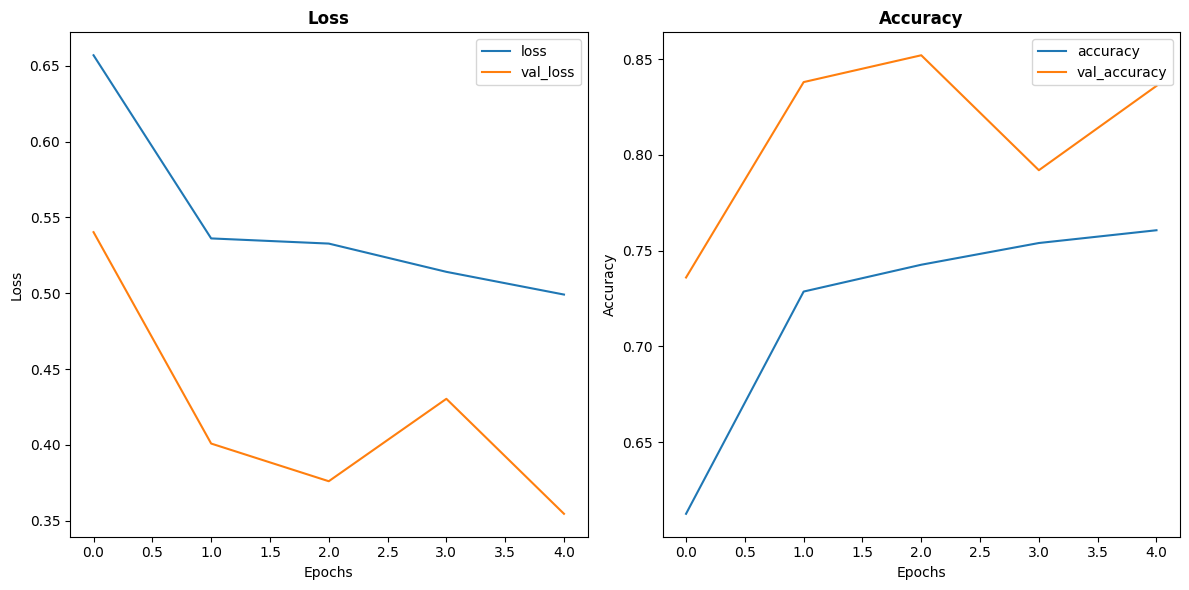

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 10)       

In [ ]:
tf.random.set_seed(42)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen = ImageDataGenerator(rescale=(1./255))
test_datagen = ImageDataGenerator(rescale=(1./255))

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               shuffle=True,
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 247ms/step - loss: 0.6451 - accuracy: 0.6093 - val_loss: 0.5143 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 7s 152ms/step - loss: 0.5131 - accuracy: 0.7720 - val_loss: 0.4593 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4444 - accuracy: 0.8087 - val_loss: 0.3748 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 7s 144ms/step - loss: 0.4469 - accuracy: 0.8053 - val_loss: 0.3810 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 6s 135ms/step - loss: 0.3960 - accuracy: 0.8313 - val_loss: 0.3675 - val_accuracy: 0.8380


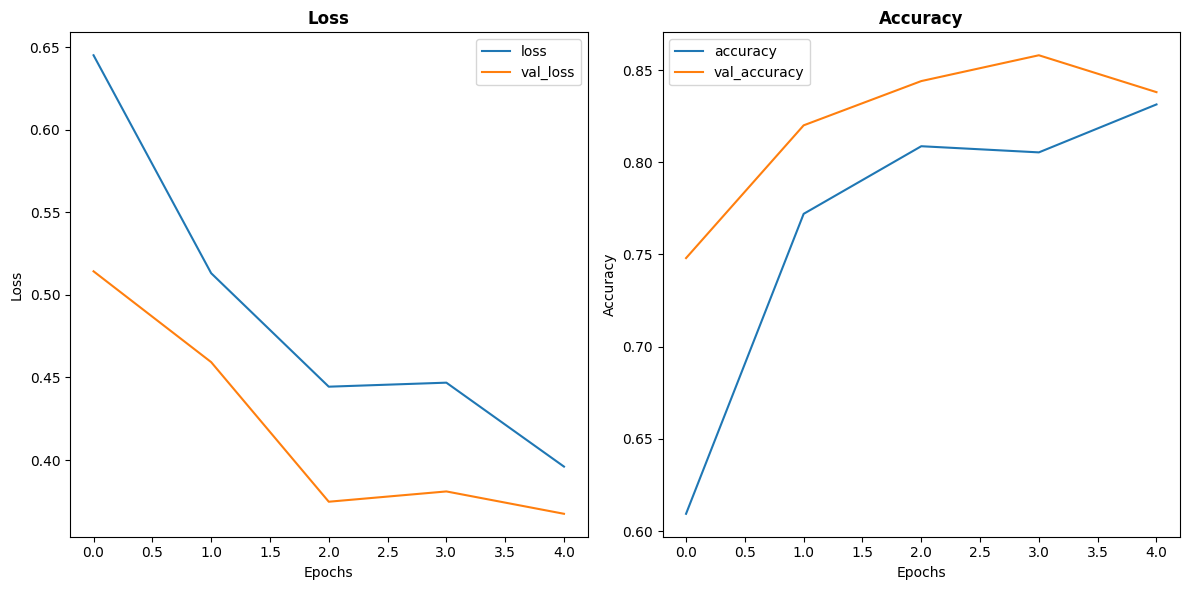

In [ ]:
plot_loss_curves(history_5)

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 32)        0         
 ng2D)                                                

In [ ]:
tf.random.set_seed(42)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen = ImageDataGenerator(rescale=(1./255))
test_datagen = ImageDataGenerator(rescale=(1./255))

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               shuffle=True,
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 371ms/step - loss: 0.6392 - accuracy: 0.6127 - val_loss: 0.5387 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.5130 - accuracy: 0.7680 - val_loss: 0.4195 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4493 - accuracy: 0.7987 - val_loss: 0.3689 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4194 - accuracy: 0.8213 - val_loss: 0.3783 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3605 - accuracy: 0.8453 - val_loss: 0.3023 - val_accuracy: 0.8820


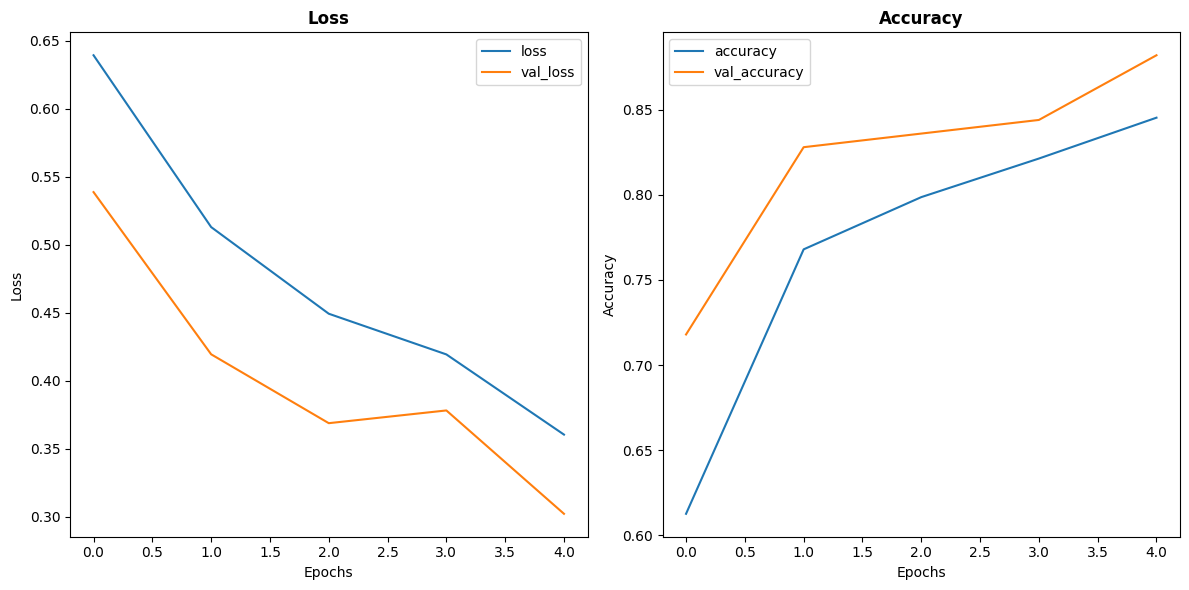

In [ ]:
plot_loss_curves(history_6)

In [ ]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_23 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 110, 110, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 108, 108, 32)      18464     
                                                                 
 conv2d_25 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 53, 53, 32)        0         
 ng2D)                                                

In [ ]:
tf.random.set_seed(42)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               shuffle=True,
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)

model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

history_7 = model_7.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 8s 133ms/step - loss: 1.3920 - accuracy: 0.5927 - val_loss: 0.5295 - val_accuracy: 0.7560
Epoch 2/10
47/47 [==============================] - 7s 146ms/step - loss: 0.5125 - accuracy: 0.7567 - val_loss: 0.5277 - val_accuracy: 0.7200
Epoch 3/10
47/47 [==============================] - 6s 131ms/step - loss: 0.4805 - accuracy: 0.7860 - val_loss: 0.4445 - val_accuracy: 0.8120
Epoch 4/10
47/47 [==============================] - 6s 133ms/step - loss: 0.4194 - accuracy: 0.8213 - val_loss: 0.3613 - val_accuracy: 0.8360
Epoch 5/10
47/47 [==============================] - 6s 127ms/step - loss: 0.3420 - accuracy: 0.8593 - val_loss: 0.3590 - val_accuracy: 0.8360
Epoch 6/10
47/47 [==============================] - 7s 146ms/step - loss: 0.3276 - accuracy: 0.8607 - val_loss: 0.4533 - val_accuracy: 0.7860
Epoch 7/10
47/47 [==============================] - 6s 124ms/step

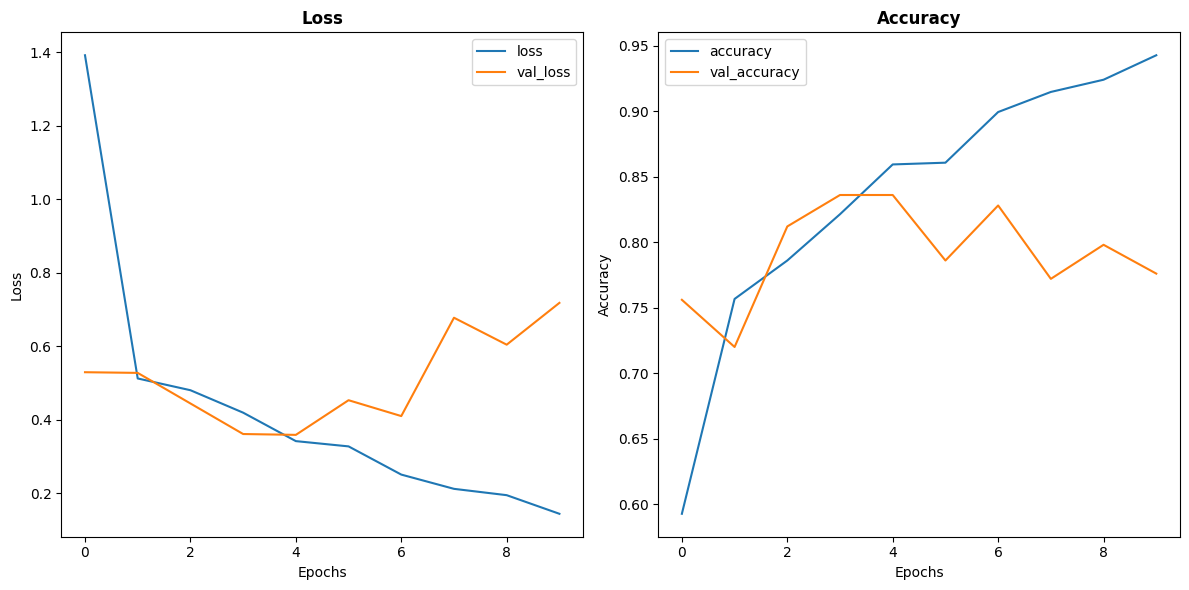

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_29 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 110, 110, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_31 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 53, 53, 32)        0         
 ng2D)                                                

In [ ]:
tf.random.set_seed(42)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               shuffle=True,
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)

model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model_8.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

history_8 = model_8.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 8s 125ms/step - loss: 13.6292 - accuracy: 0.5667 - val_loss: 0.5684 - val_accuracy: 0.7700
Epoch 2/10
47/47 [==============================] - 7s 146ms/step - loss: 0.5436 - accuracy: 0.7500 - val_loss: 0.5337 - val_accuracy: 0.7120
Epoch 3/10
47/47 [==============================] - 10s 214ms/step - loss: 0.4754 - accuracy: 0.7800 - val_loss: 0.4547 - val_accuracy: 0.7720
Epoch 4/10
47/47 [==============================] - 7s 144ms/step - loss: 0.4280 - accuracy: 0.8133 - val_loss: 0.3503 - val_accuracy: 0.8520
Epoch 5/10
47/47 [==============================] - 6s 121ms/step - loss: 0.3444 - accuracy: 0.8560 - val_loss: 0.4033 - val_accuracy: 0.8300
Epoch 6/10
47/47 [==============================] - 6s 118ms/step - loss: 0.2998 - accuracy: 0.8733 - val_loss: 0.3112 - val_accuracy: 0.8760
Epoch 7/10
47/47 [==============================] - 6s 134ms/st

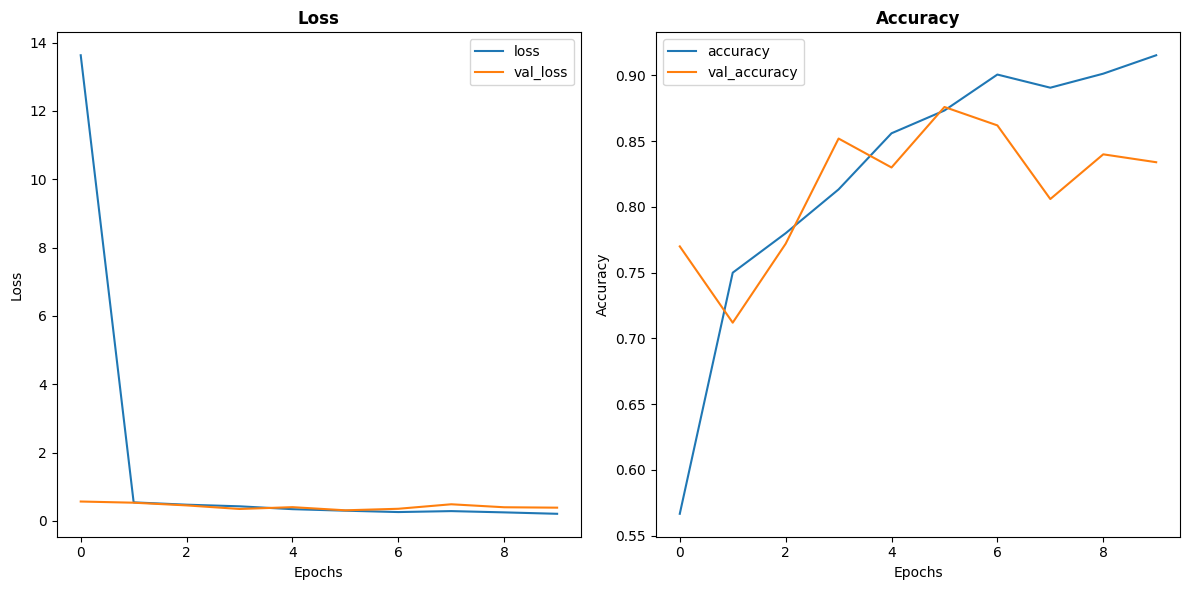

In [ ]:
plot_loss_curves(history_8)

In [ ]:
model_8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 26, 26, 128)      

In [ ]:
tf.random.set_seed(42)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               shuffle=True,
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)

model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 10s 146ms/step - loss: 1.9375 - accuracy: 0.6313 - val_loss: 0.4862 - val_accuracy: 0.7780
Epoch 2/10
47/47 [==============================] - 6s 131ms/step - loss: 0.5029 - accuracy: 0.7773 - val_loss: 0.4459 - val_accuracy: 0.7980
Epoch 3/10
47/47 [==============================] - 6s 123ms/step - loss: 0.4576 - accuracy: 0.7993 - val_loss: 0.4186 - val_accuracy: 0.8180
Epoch 4/10
47/47 [==============================] - 6s 128ms/step - loss: 0.3814 - accuracy: 0.8400 - val_loss: 0.3963 - val_accuracy: 0.8200
Epoch 5/10
47/47 [==============================] - 6s 118ms/step - loss: 0.3283 - accuracy: 0.8613 - val_loss: 0.4114 - val_accuracy: 0.8340
Epoch 6/10
47/47 [==============================] - 6s 134ms/step - loss: 0.2960 - accuracy: 0.8793 - val_loss: 0.4334 - val_accuracy: 0.8220
Epoch 7/10
47/47 [==============================] - 6s 134ms/ste

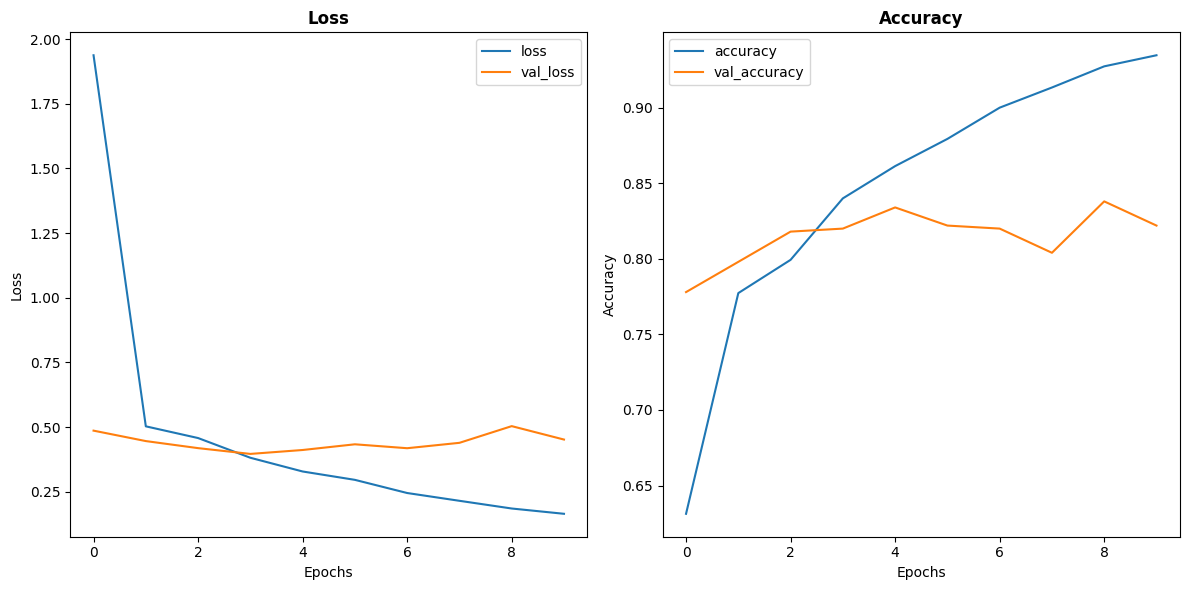

In [ ]:
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 26, 26, 64)       

So far, the performance we got from each models are:
* **model_1:** loss: 0.3277 - accuracy: 0.8607 - val_loss: 0.3047 - val_accuracy: 0.8760
* **model_2:** loss: 0.4846 - accuracy: 0.7560 - val_loss: 0.6592 - val_accuracy: 0.6480
* **model_3:** loss: 0.3215 - accuracy: 0.8633 - val_loss: 0.3976 - val_accuracy: 0.8240
* **model_4:** loss: 0.4991 - accuracy: 0.7607 - val_loss: 0.3545 - val_accuracy: 0.8360
* **model_5:** loss: 0.3960 - accuracy: 0.8313 - val_loss: 0.3675 - val_accuracy: 0.8380
* **model_6:** loss: 0.3605 - accuracy: 0.8453 - val_loss: 0.3023 - val_accuracy: 0.8820
* **model_7:** loss: 0.1442 - accuracy: 0.9427 - val_loss: 0.7182 - val_accuracy: 0.7760
* **model_8:** loss: 0.2090 - accuracy: 0.9153 - val_loss: 0.3885 - val_accuracy: 0.8340
* **model_9:** loss: 0.1647 - accuracy: 0.9347 - val_loss: 0.4518 - val_accuracy: 0.8220

In [ ]:
from joblib import dump, load

# # Save the model
# dump(model_1, "best_model.h5")

# Load the model
best_model = load("best_model.h5")

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("/content/03-steak.jpeg")
steak = tf.expand_dims(steak, axis=0)
steak.shape

TensorShape([1, 224, 224, 3])

In [ ]:
best_model.predict(steak)

1/1 [==============================] - 0s 229ms/step


array([[0.9824099]], dtype=float32)

In [ ]:
def plot_custom_image(model, filename, img_shape=224):
    img = load_and_prep_image(filename, img_shape)

    plt.imshow(img)
    prediction = model.predict(tf.expand_dims(img, axis=0))
    prediction = "Pizza" if prediction < 0.5 else "Steak"
    plt.title(f"Prediction: {prediction}")
    plt.axis("Off")
    plt.show()

1/1 [==============================] - 0s 40ms/step


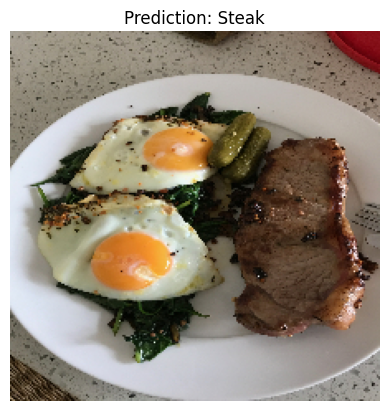

In [ ]:
plot_custom_image(best_model, "03-steak.jpeg")

1/1 [==============================] - 0s 35ms/step


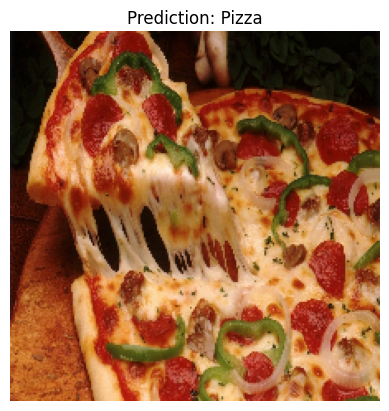

In [ ]:
plot_custom_image(best_model, "/content/pizza_image.jpg")

## Multi-Class Classification

We've been through a bunch of the following steps of a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi class classification).
1. Become one with the data
2. Preprocess the data (get it ready for model)
3. Create a model (Start with a baseline)
4. Fit the model (Overfit it and make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (Try to beat the baseline model/reduce overfitting.)
7. Repeat until satisfied

In [ ]:
import zipfile
import os
import pathlib
import numpy as np
import matplotlib.image as mpimg
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-03-28 16:56:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  39.6MB/s    in 13s     

2024-03-28 16:57:00 (37.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

In [ ]:
test_dir = "10_food_classes_all_data/test/"
train_dir = "10_food_classes_all_data/train/"

In [ ]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# View an image
def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('Off')

  print(f"Image Shape: {img.shape}")

  return img

Image Shape: (512, 512, 3)


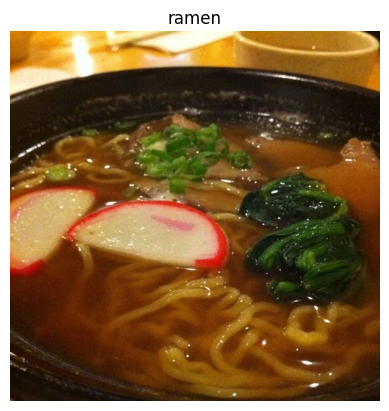

In [ ]:
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(loss))
  plt.figure(figsize=(12, 6))

  # Loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss', fontweight='bold')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title('accuracy', fontweight='bold')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
tf.random.set_seed(42)

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             seed=42)

model_11 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3,
                           activation='relu'),
    tf.keras.layers.Conv2D(10 ,3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_11.compile(loss="categorical_crossentropy",
                 optimizer="Adam",
                 metrics=['accuracy'])

history_11 = model_11.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/5
235/235 [==============================] - 32s 128ms/step - loss: 2.0987 - accuracy: 0.2463 - val_loss: 1.9752 - val_accuracy: 0.3004
Epoch 2/5
235/235 [==============================] - 28s 120ms/step - loss: 1.8524 - accuracy: 0.3649 - val_loss: 1.8558 - val_accuracy: 0.3552
Epoch 3/5
235/235 [==============================] - 30s 127ms/step - loss: 1.5550 - accuracy: 0.4824 - val_loss: 1.9315 - val_accuracy: 0.3608
Epoch 4/5
235/235 [==============================] - 30s 127ms/step - loss: 0.9660 - accuracy: 0.6839 - val_loss: 2.3884 - val_accuracy: 0.3304
Epoch 5/5
235/235 [==============================] - 29s 122ms/step - loss: 0.3893 - accuracy: 0.8807 - val_loss: 3.2024 - val_accuracy: 0.2864


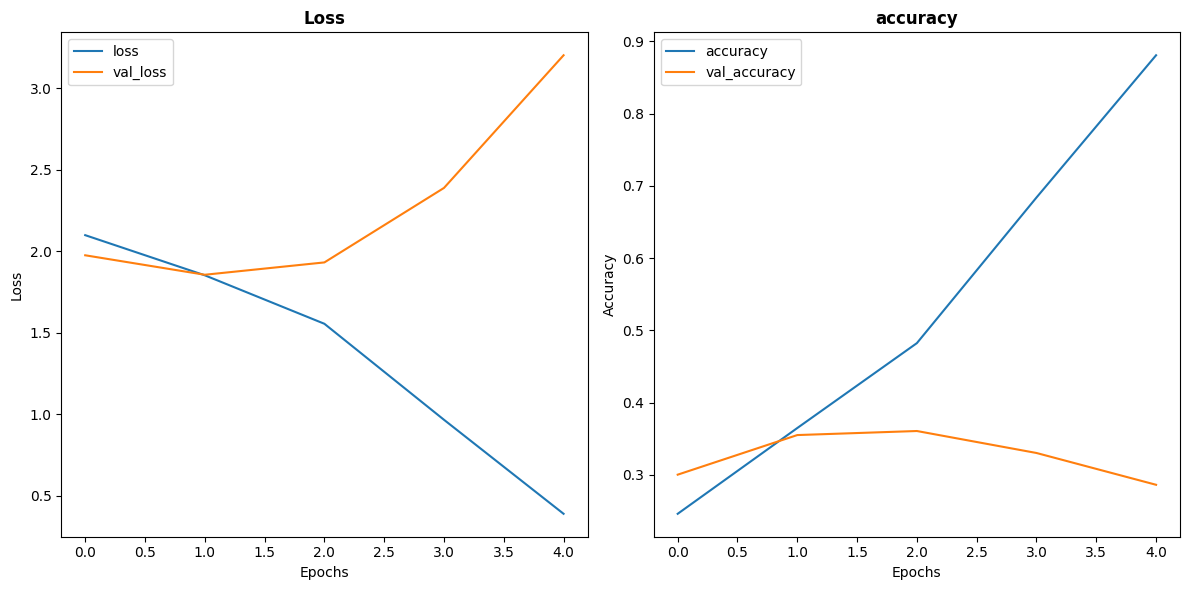

In [ ]:
plot_loss_curves(history_11)

In [ ]:
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [ ]:
tf.random.set_seed(42)

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             seed=42)

model_12 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10, 3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss="categorical_crossentropy",
                 optimizer="Adam",
                 metrics=['accuracy'])

history_12 = model_12.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/5
235/235 [==============================] - 30s 121ms/step - loss: 2.1731 - accuracy: 0.2104 - val_loss: 2.0595 - val_accuracy: 0.2496
Epoch 2/5
235/235 [==============================] - 27s 114ms/step - loss: 1.8291 - accuracy: 0.3673 - val_loss: 1.9892 - val_accuracy: 0.3204
Epoch 3/5
235/235 [==============================] - 32s 135ms/step - loss: 1.3711 - accuracy: 0.5479 - val_loss: 2.1387 - val_accuracy: 0.2972
Epoch 4/5
235/235 [==============================] - 28s 120ms/step - loss: 0.7855 - accuracy: 0.7563 - val_loss: 2.3546 - val_accuracy: 0.3128
Epoch 5/5
235/235 [==============================] - 28s 120ms/step - loss: 0.3464 - accuracy: 0.9113 - val_loss: 3.0197 - val_accuracy: 0.2876


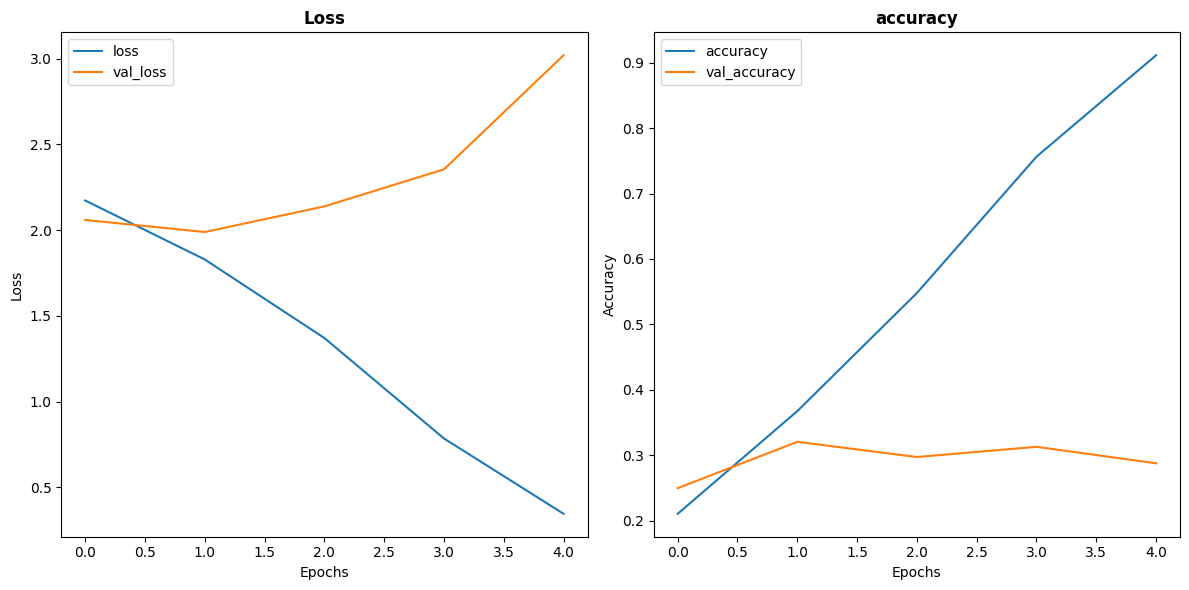

In [ ]:
plot_loss_curves(history_12)

In [ ]:
model_12.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 29160)             0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
train_datagen_augumented = ImageDataGenerator(rescale = 1./255,
                                              rotation_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)

train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                     target_size=(224, 224),
                                                                     seed=42)

Found 7500 images belonging to 10 classes.


In [ ]:
model_13 = tf.keras.models.clone_model(model_11)

model_13.compile(loss="categorical_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

history_13 = model_13.fit(train_data_augumented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augumented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 118s 492ms/step - loss: 2.2989 - accuracy: 0.1065 - val_loss: 2.3000 - val_accuracy: 0.1208
Epoch 2/5
235/235 [==============================] - 121s 517ms/step - loss: 2.2944 - accuracy: 0.1208 - val_loss: 2.2651 - val_accuracy: 0.1488
Epoch 3/5
235/235 [==============================] - 111s 468ms/step - loss: 2.2619 - accuracy: 0.1576 - val_loss: 2.1446 - val_accuracy: 0.2164
Epoch 4/5
235/235 [==============================] - 141s 599ms/step - loss: 2.1412 - accuracy: 0.2284 - val_loss: 1.9684 - val_accuracy: 0.3136
Epoch 5/5
235/235 [==============================] - 116s 493ms/step - loss: 2.0642 - accuracy: 0.2668 - val_loss: 1.9829 - val_accuracy: 0.2944


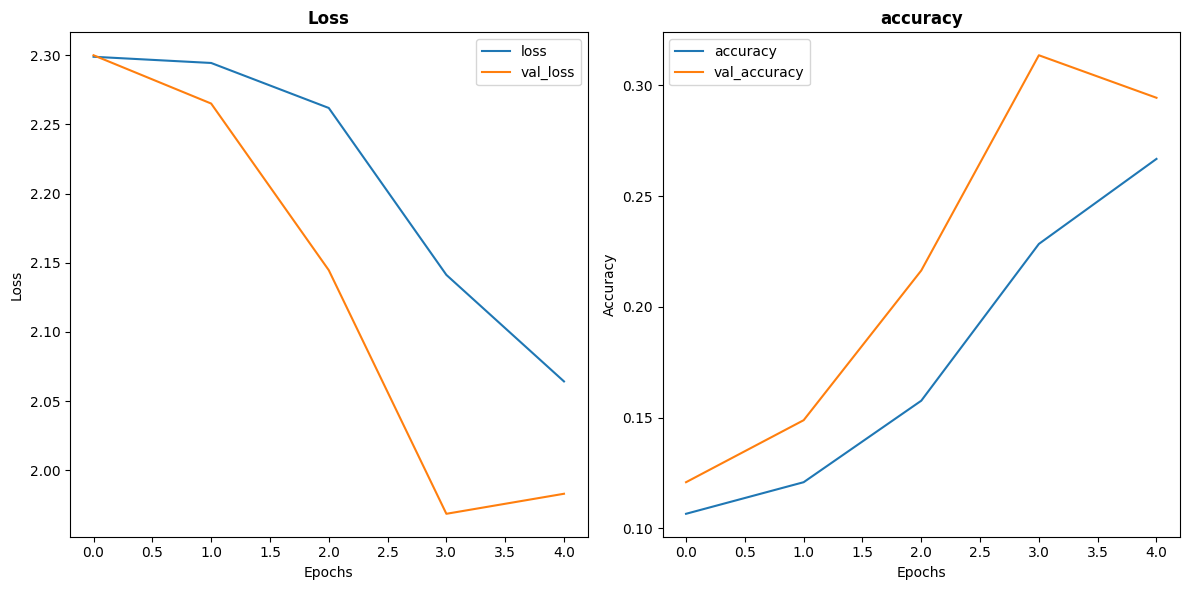

In [ ]:
plot_loss_curves(history_13)

In [ ]:
model_13.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [ ]:
tf.random.set_seed(42)

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             seed=42)

model_14 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model_14.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

history_14 = model_14.fit(train_data,
                          epochs=10,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/10
235/235 [==============================] - 41s 141ms/step - loss: 2.1711 - accuracy: 0.1925 - val_loss: 2.0221 - val_accuracy: 0.2476
Epoch 2/10
235/235 [==============================] - 32s 135ms/step - loss: 1.9482 - accuracy: 0.3123 - val_loss: 1.8500 - val_accuracy: 0.3560
Epoch 3/10
235/235 [==============================] - 32s 135ms/step - loss: 1.7622 - accuracy: 0.3956 - val_loss: 1.8086 - val_accuracy: 0.3808
Epoch 4/10
235/235 [==============================] - 31s 134ms/step - loss: 1.5971 - accuracy: 0.4563 - val_loss: 1.6603 - val_accuracy: 0.4444
Epoch 5/10
235/235 [==============================] - 32s 136ms/step - loss: 1.4041 - accuracy: 0.5219 - val_loss: 1.6270 - val_accuracy: 0.4616
Epoch 6/10
235/235 [==============================] - 32s 135ms/step - loss: 1.1890 - accuracy: 0.5953 - val_loss: 1.7013 - val_accuracy: 0.4692
Epoch 7/10
235/235 [========================

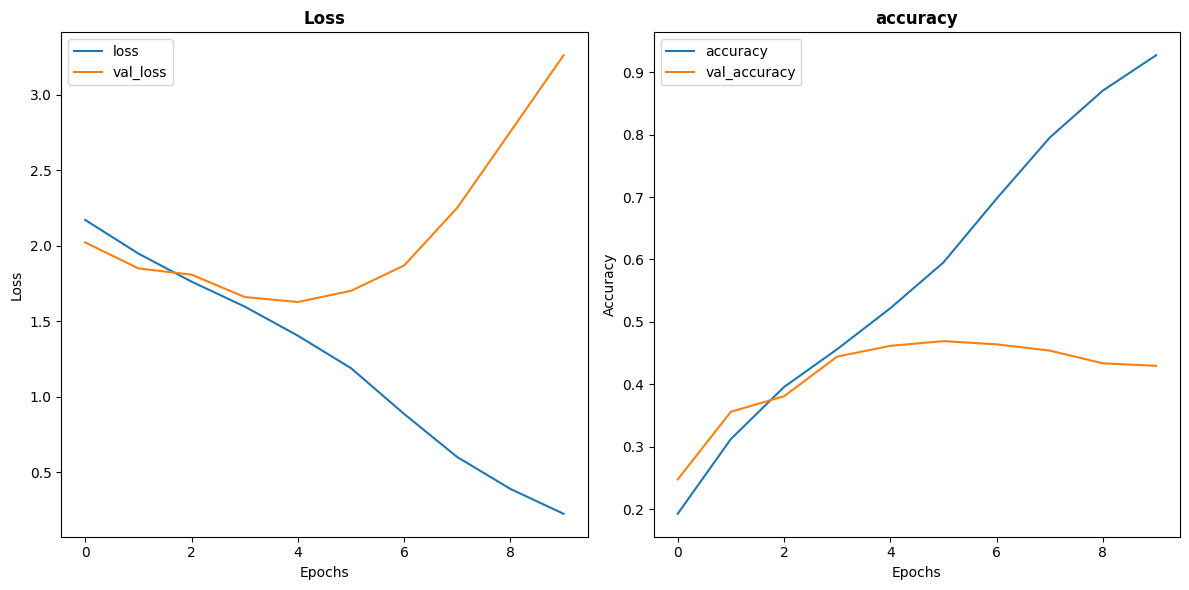

In [ ]:
plot_loss_curves(history_14)

In [ ]:
model_14.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
tf.random.set_seed(42)

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

test_datagen = ImageDataGenerator(rescale = 1./255)

train_datagen_augumented = ImageDataGenerator(rescale = 1./255,
                                              rotation_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)

train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                     target_size=(224, 224),
                                                                     seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             seed=42)

model_15 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model_15.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

history_15 = model_15.fit(train_data_augumented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augumented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/10
235/235 [==============================] - 116s 455ms/step - loss: 2.2210 - accuracy: 0.1773 - val_loss: 2.1026 - val_accuracy: 0.2268
Epoch 2/10
235/235 [==============================] - 109s 466ms/step - loss: 2.0820 - accuracy: 0.2477 - val_loss: 1.9712 - val_accuracy: 0.3116
Epoch 3/10
235/235 [==============================] - 104s 444ms/step - loss: 1.9768 - accuracy: 0.2965 - val_loss: 1.7975 - val_accuracy: 0.3780
Epoch 4/10
235/235 [==============================] - 103s 439ms/step - loss: 1.8972 - accuracy: 0.3365 - val_loss: 1.7231 - val_accuracy: 0.4116
Epoch 5/10
235/235 [==============================] - 119s 509ms/step - loss: 1.8143 - accuracy: 0.3759 - val_loss: 1.7178 - val_accuracy: 0.4104
Epoch 6/10
235/235 [==============================] - 138s 589ms/step - loss: 1.7846 - accuracy: 0.3869 - val_loss: 1.6075 - val_accuracy: 0.4552
Epoch 7/10
235/235 [==================

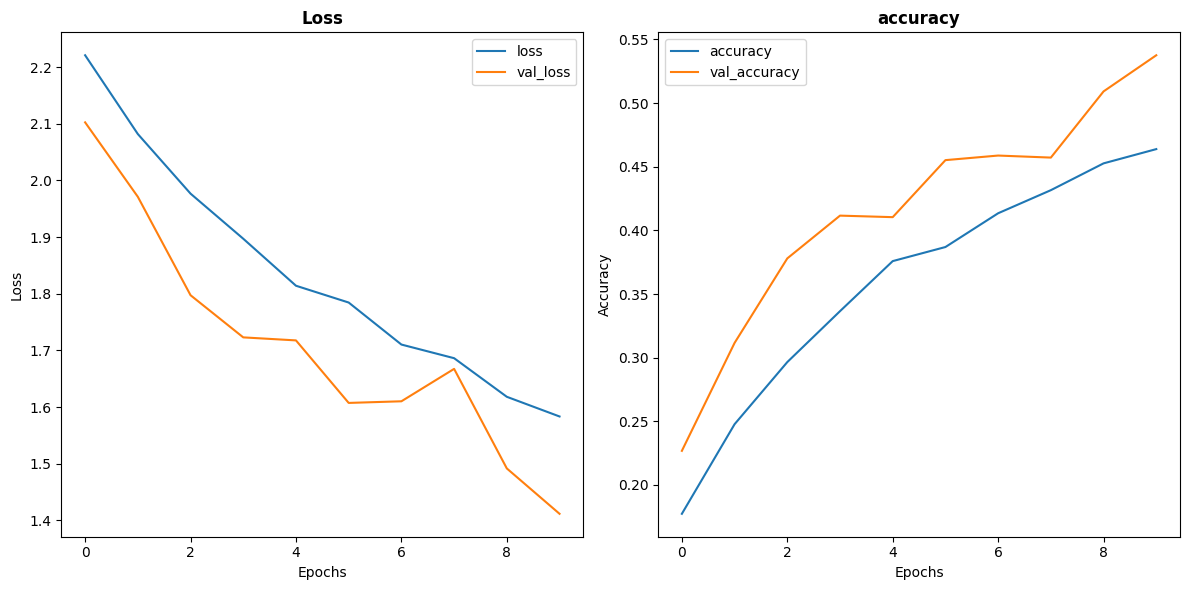

In [ ]:
plot_loss_curves(history_15)

In [ ]:
model_15.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 128)      

In [ ]:
tf.random.set_seed(42)

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

test_datagen = ImageDataGenerator(rescale = 1./255)

train_datagen_augumented = ImageDataGenerator(rescale = 1./255,
                                              rotation_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)

train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                     target_size=(224, 224),
                                                                     seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             seed=42)

model_16 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_16.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

history_16 = model_16.fit(train_data_augumented,
                          epochs=20,
                          steps_per_epoch=len(train_data_augumented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/20
235/235 [==============================] - 125s 492ms/step - loss: 2.2567 - accuracy: 0.1463 - val_loss: 2.0629 - val_accuracy: 0.2616
Epoch 2/20
235/235 [==============================] - 107s 454ms/step - loss: 2.1091 - accuracy: 0.2317 - val_loss: 1.9965 - val_accuracy: 0.2784
Epoch 3/20
235/235 [==============================] - 106s 450ms/step - loss: 2.0085 - accuracy: 0.2868 - val_loss: 1.8722 - val_accuracy: 0.3604
Epoch 4/20
235/235 [==============================] - 107s 455ms/step - loss: 1.9260 - accuracy: 0.3271 - val_loss: 1.7870 - val_accuracy: 0.3788
Epoch 5/20
235/235 [==============================] - 107s 453ms/step - loss: 1.8716 - accuracy: 0.3488 - val_loss: 1.7534 - val_accuracy: 0.3936
Epoch 6/20
235/235 [==============================] - 105s 446ms/step - loss: 1.8188 - accuracy: 0.3677 - val_loss: 1.6557 - val_accuracy: 0.4396
Epoch 7/20
235/235 [==================

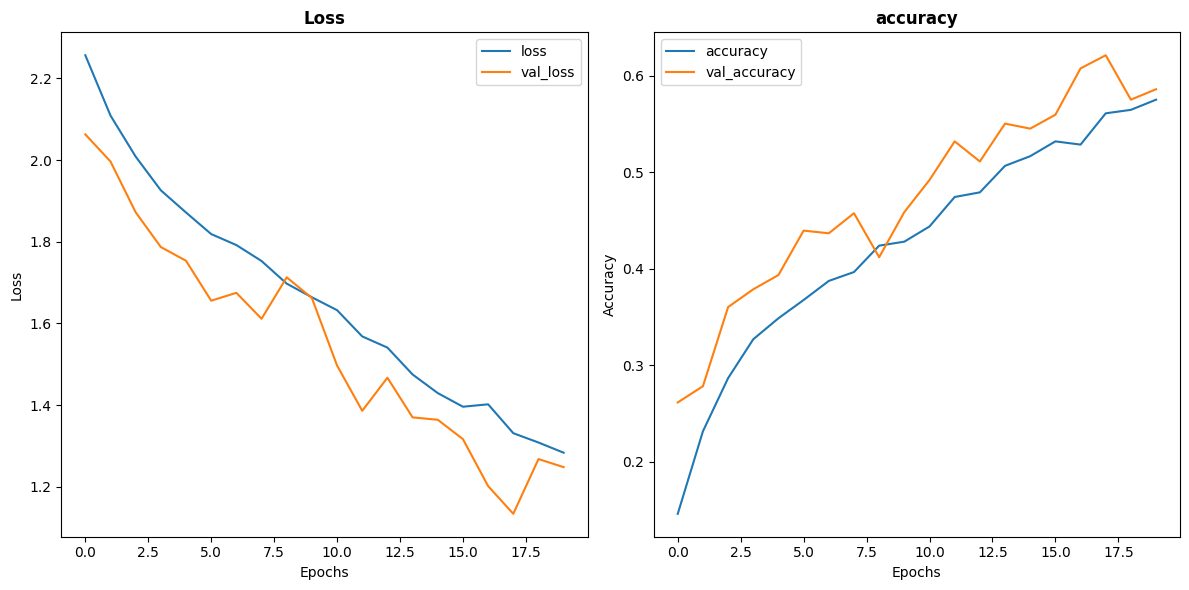

In [ ]:
plot_loss_curves(history_16)

In [ ]:
model_16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
from joblib import dump, load

dump(model_16, "best_model2.h5")

best_model2 = load("best_model2.h5")

In [ ]:
test_dir = "10_food_classes_all_data/test/"
train_dir = "10_food_classes_all_data/train/"

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
def plot_custom_image(model, filename, img_shape=224, class_names=class_names):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.

  plt.imshow(img)
  prediction = model.predict((tf.expand_dims(img, axis=0)))

  if len(prediction[0]) > 1:
    print("Multi Class Classification.")
    prediction = class_names[tf.argmax(prediction[0])]
  else:
    print("Binary Classification.")
    prediction = class_names[int(tf.round(prediction)[0][0])]

  plt.title(f"Prediction: {prediction}")
  plt.axis("Off")
  plt.show()

1/1 [==============================] - 0s 26ms/step
Multi Class Classification.


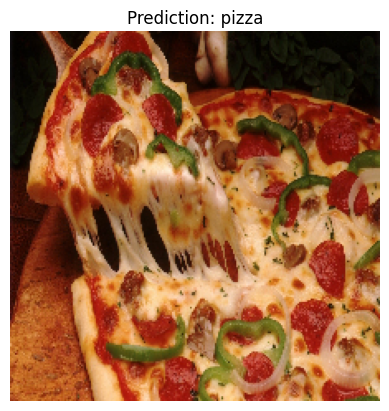

In [ ]:
plot_custom_image(best_model2, "/content/00-pizza.jpg")

1/1 [==============================] - 0s 17ms/step
Multi Class Classification.


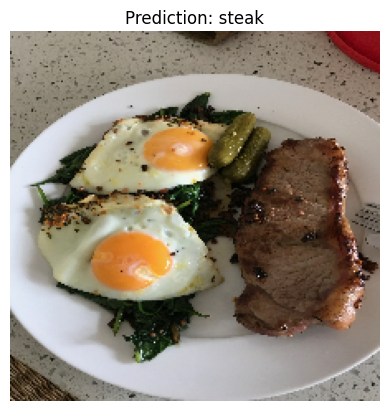

In [ ]:
plot_custom_image(best_model2, "/content/01-steak.jpeg")

1/1 [==============================] - 0s 17ms/step
Multi Class Classification.


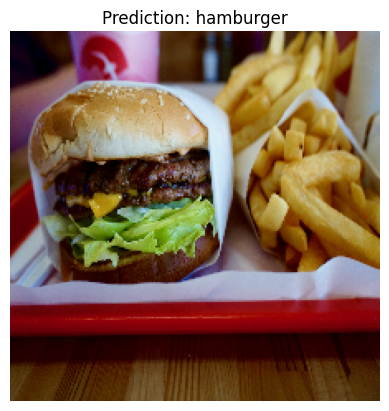

In [ ]:
plot_custom_image(best_model2, "/content/02-hamburger.jpeg")

1/1 [==============================] - 0s 18ms/step
Multi Class Classification.


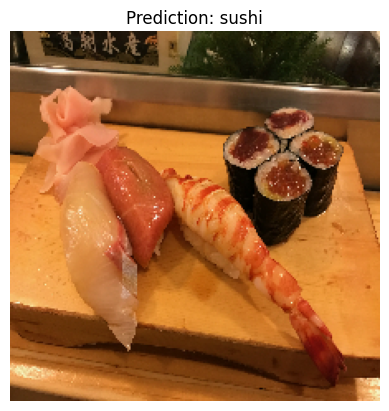

In [ ]:
plot_custom_image(best_model2, "/content/03-sushi.jpeg")